
# Project: Investigating TMDb movies dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we will be analyzing data collected from the movie database TMDb. The set contains infromation about 10,000 movies including user ratings and revenue.
> In particular we will be interested in finding trends among movies with high revenues and high ratings.

> Questions : <br>
1 - What properties are associated with movies that have high revenue?<br>
2 - Which genres are most popular from year to year? <br>
3 - Which actors have the most roles in popular movies? <br>
4 - How much revenue is generated by the most popular production companies?<br>
5 - Is the budget of a film and its rating corellated?<br>
6 - Is the budget of a film and its revenue corellated?<br>
7 - What is the best month to release a movie?<br>
8 - What movies got the highest rating each year?<br>
9 - Who is the most popular director?<br>
10 - What is the most frequent runtime of movies?


>Import the libraries we will be using

In [1206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

>I will load my dataset into a dataframe using pandas.

In [1207]:
#Read csv file into dataframe df_movies
df_movies = pd.read_csv('csv/DataSetsForProject2/tmdb_movies.csv')
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>Most of the columns are self explanatory, so I will not explain them all but here are some points.<br><br>
1 - The movies are sorted by popularity which is a metric calculated based on user interactions on this website. Things like page views, users adding it to a list, users rating it, etc. Its has a lower limit (zero) but no upper limit.<br><br>
2 - Runtime of the movies is in minutes.<br><br>
3 - Columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.<br><br>
4 - The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars,accounting for inflation over time.<br><br>
5 - There are many cells in the revenue and budget columns with a value of zero.

>### First lets get an overview of the data we are working with,the shape,datatypes etc.

In [1208]:
df_movies.shape

(10866, 21)

The dataset contains 10866 rows and 21 columns

In [1209]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>Most of the columns dont have missing data, and the the ones that do are not essential for our analysis.

In [1210]:
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning 

### 1- Remove unused columns
First I will drop the columns which are not useful for my analysis. I dropped both budget and revenue columns and left revenue_adj as I will only be using the adjusted value in my analysis.

In [1211]:
df_movies.drop(['id','imdb_id','keywords','homepage','tagline','overview','budget','revenue'],axis = 1,inplace=True)

In [1212]:
df_movies.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [1213]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   original_title        10866 non-null  object 
 2   cast                  10790 non-null  object 
 3   director              10822 non-null  object 
 4   runtime               10866 non-null  int64  
 5   genres                10843 non-null  object 
 6   production_companies  9836 non-null   object 
 7   release_date          10866 non-null  object 
 8   vote_count            10866 non-null  int64  
 9   vote_average          10866 non-null  float64
 10  release_year          10866 non-null  int64  
 11  budget_adj            10866 non-null  float64
 12  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(3), object(6)
memory usage: 1.1+ MB


>There is missing data in cast,director,genres,production_companies columns, I will not drop them all as I think this would remove alot of important information so I will just put in a word like 'unknown' in place for each column.

In [1214]:
#For each column I will fill in empty rows with a string representing that there was no info here.
df_movies.cast.fillna('unknown',inplace=True)
df_movies.director.fillna('unknown',inplace=True)
df_movies.production_companies.fillna('unknown',inplace=True)
df_movies.genres.fillna('unknown',inplace=True)

In [1215]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   original_title        10866 non-null  object 
 2   cast                  10866 non-null  object 
 3   director              10866 non-null  object 
 4   runtime               10866 non-null  int64  
 5   genres                10866 non-null  object 
 6   production_companies  10866 non-null  object 
 7   release_date          10866 non-null  object 
 8   vote_count            10866 non-null  int64  
 9   vote_average          10866 non-null  float64
 10  release_year          10866 non-null  int64  
 11  budget_adj            10866 non-null  float64
 12  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(3), object(6)
memory usage: 1.1+ MB


>We now have no NaN cells

### 2- Remove Duplicates
Check for duplicated rows

In [819]:
df_movies.duplicated().sum()

1

We only have one,drop it.

In [820]:
df_movies.drop_duplicates(inplace=True)

In [821]:
#Check again,they should be zero
df_movies.duplicated().sum()

0

### 3- Change datatypes
Convert last two columns from float to int64

In [1216]:
df_movies['budget_adj'] = df_movies['budget_adj'].astype(np.int64)

In [1217]:
df_movies['revenue_adj'] = df_movies['revenue_adj'].astype(np.int64)

### 4- Remove 0's from budget and the revenue columns
Many of the budget and revenue rows have a value of zero, we will remove them as they will disrupt our analysis

In [1218]:
#Replace every zero with NaN
df_movies[['budget_adj','revenue_adj']] = df_movies[['budget_adj','revenue_adj']].replace(0,np.NAN) 

#Drop all nan rows
df_movies.dropna(inplace=True)

In [1219]:
#Number of rows left after
df_movies.shape

(3854, 13)

In [1220]:
df_movies.dtypes

popularity              float64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### 5- Change date to standard date format
The date columns is a regular string, we want it in date format

In [1221]:
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : What properties are associated with movies that have high revenue?

Create a new column [profit] to get a better idea of how well a film did.

In [1222]:
df_movies['profit'] = df_movies['revenue_adj'] - df_movies['budget_adj']

I will split my revenue data into bins to make them easier to analyse

In [1223]:
bin_edges = [-1,0,1000000,10000000,100000000,1000000000,2000000000]
bins = ['NA','<1M','<10M','<100M','<1B','>1B']

In [1224]:
df_movies['revenue_info'] = pd.cut(df_movies['revenue_adj'],bin_edges,labels = bins)
df_movies.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,revenue_info
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.0,1.392446e+09,1.254446e+09,>1B
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939.0,3.481613e+08,2.101614e+08,<1B
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955.0,2.716190e+08,1.704191e+08,<1B
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09,1.718723e+09,>1B
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923.0,1.385749e+09,1.210949e+09,>1B


## Runtime

>I noticed that movies with higher revenues, on average, have higher runtimes. I will plot the relation on a bar chart to make it more clear

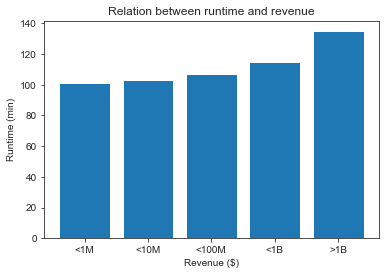

In [1225]:
#df_movies['revenue_info'].unique()
plt.bar(bins,df_movies.groupby(['revenue_info'])['runtime'].mean())
plt.title('Relation between runtime and revenue')
plt.xlabel('Revenue ($)')
plt.ylabel('Runtime (min)');

### Conclusion

>We can see that this is in fact true,movies that cross the billion dollar mark are on average longer than 2 hours.

### Research Question 2 : Which genres are most popular from year to year.

> We want to find out the most popular genre for each year out of the movies in our dataset.

In [1226]:
#This function takes the year range and returns series with each genre and its count
def popular_genre (x,y):
    #Extract the year range into a new dataframe
    range_df = df_movies.query('@x <= release_year <= @y')
    #Concatenate all the rows
    data_string = range_df.genres.str.cat(sep = '|')
    data = pd.Series(data_string.split('|'))
    info = data.value_counts()
    return info

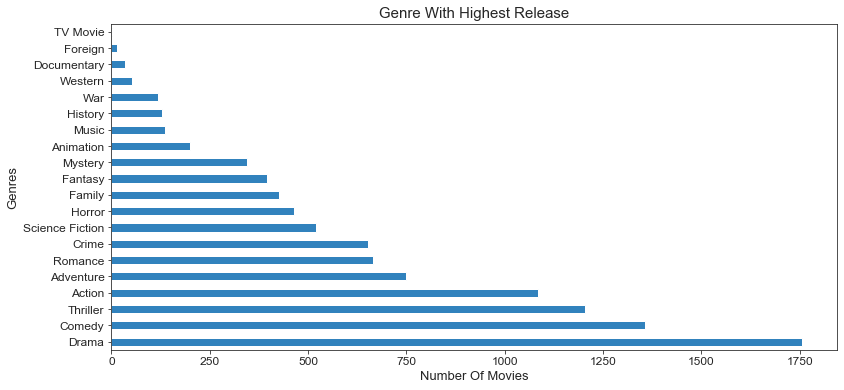

In [1227]:
#call the function for counting the movies of each genre.
total_genre_movies = popular_genre(1960,2015)
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style("whitegrid")

### Conclusion

>In 1960 drama was the most popular genre, in 2015 it is still drama. Over all time drama is also the most popular genre.

### Research Question 3: Which actors have the most roles in popular movies?

>We want to find which actor has participated the most in movies with the highest vote average?

In [1229]:
#This function returns a df with movies with vote average higher than 7.5
def popular_movies():
    return df_movies[df_movies['vote_average'] >= 7.5]

In [1230]:
#This function returns a series with the name of each actor and the number of popular movies they participated in.
def popular_actors():
    #Get all movies with a rating higher than 7.5
    df_popular = popular_movies()
    #Concatenate
    data_string = df_popular.cast.str.cat(sep = '|')
    #Split the string into data
    data = pd.Series(data_string.split('|'))
    #Count the occurences of each actor
    info = data.value_counts()
    return info

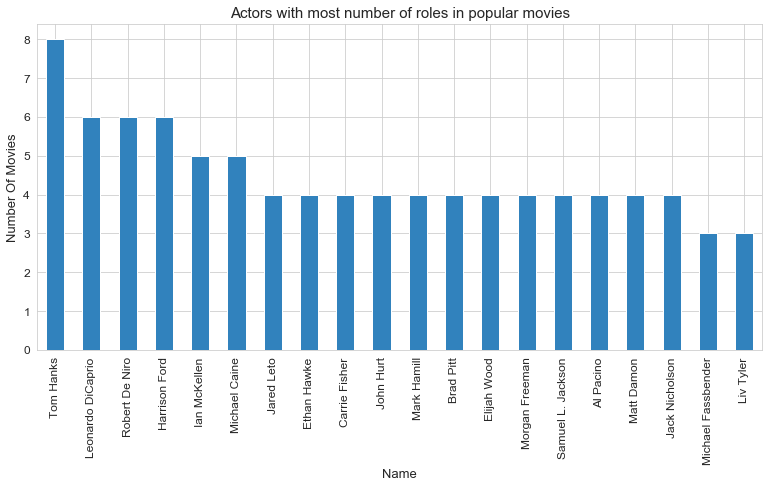

In [1231]:
#call the function for counting the number of popular movies of each actor.
popular_actors_count = popular_actors()
#plot a 'bar' plot using plot function for 'Actor vs number of popular movies'.
popular_actors_count[:20].plot(kind= 'bar',figsize = (13,6),fontsize=12,colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Actors with most number of roles in popular movies",fontsize=15)
plt.xlabel('Name',fontsize=13)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

### Conclusion

>Tom Hanks is the actor with most roles in popular movies like Cast away , Catch me if you can , Toy Story etc..

### Research Question 4 : How much revenue is generated by the most popular production companies?

>We want to find the revenue by the most popular production companies.

We want to find out the number of movies made by each production company then find the revenue of the top 10.

In [1232]:
#Returns a series with the count of each production company sorted descendingly
def popular_production_companies():
    #Concatenate all the rows
    data_string = df_movies.production_companies.str.cat(sep = '|')
    data = pd.Series(data_string.split('|'))
    info = data.value_counts()
    return info

In [1233]:
#Get the series with count of each production company
popular_production_companies_count = popular_production_companies()
popular_production_companies_count

Universal Pictures                        329
Warner Bros.                              324
Paramount Pictures                        270
Twentieth Century Fox Film Corporation    201
Columbia Pictures                         178
                                         ... 
5150 Action                                 1
Level 1 Entertainment                       1
Darius Films                                1
VAE Productions                             1
Latitude Productions                        1
Length: 3263, dtype: int64

Now we want to look at the top 10

In [1234]:
#Create two lists for the names and revenues
Revenues=[]
Names =[]
#loop through top 10
for i in range(10):
    #Group by production companies column and search for the names of the top 10 saved in the previous series,then get the sum of their revenue.
    #This part [:5] is because one of the companies 'Metro-Goldwyn-Mayer (MGM)' was causing a problem, I think it is because of the brackets in the name.
    #Append to the revenue list
    Revenues.append(df_movies.groupby(df_movies['production_companies'].str.contains(popular_production_companies_count.index[i][:5]))['revenue_adj'].sum()[1])
    #Append to the name list
    Names.append(popular_production_companies_count.index[i])

print(Revenues)
print(Names)

[64108018626.0, 69355202024.0, 54904771550.0, 55155653955.0, 49853238967.0, 22872481703.0, 44117115306.0, 16291568231.0, 19523175306.0, 13425097241.0]
['Universal Pictures', 'Warner Bros.', 'Paramount Pictures', 'Twentieth Century Fox Film Corporation', 'Columbia Pictures', 'New Line Cinema', 'Walt Disney Pictures', 'Touchstone Pictures', 'Metro-Goldwyn-Mayer (MGM)', 'Relativity Media']


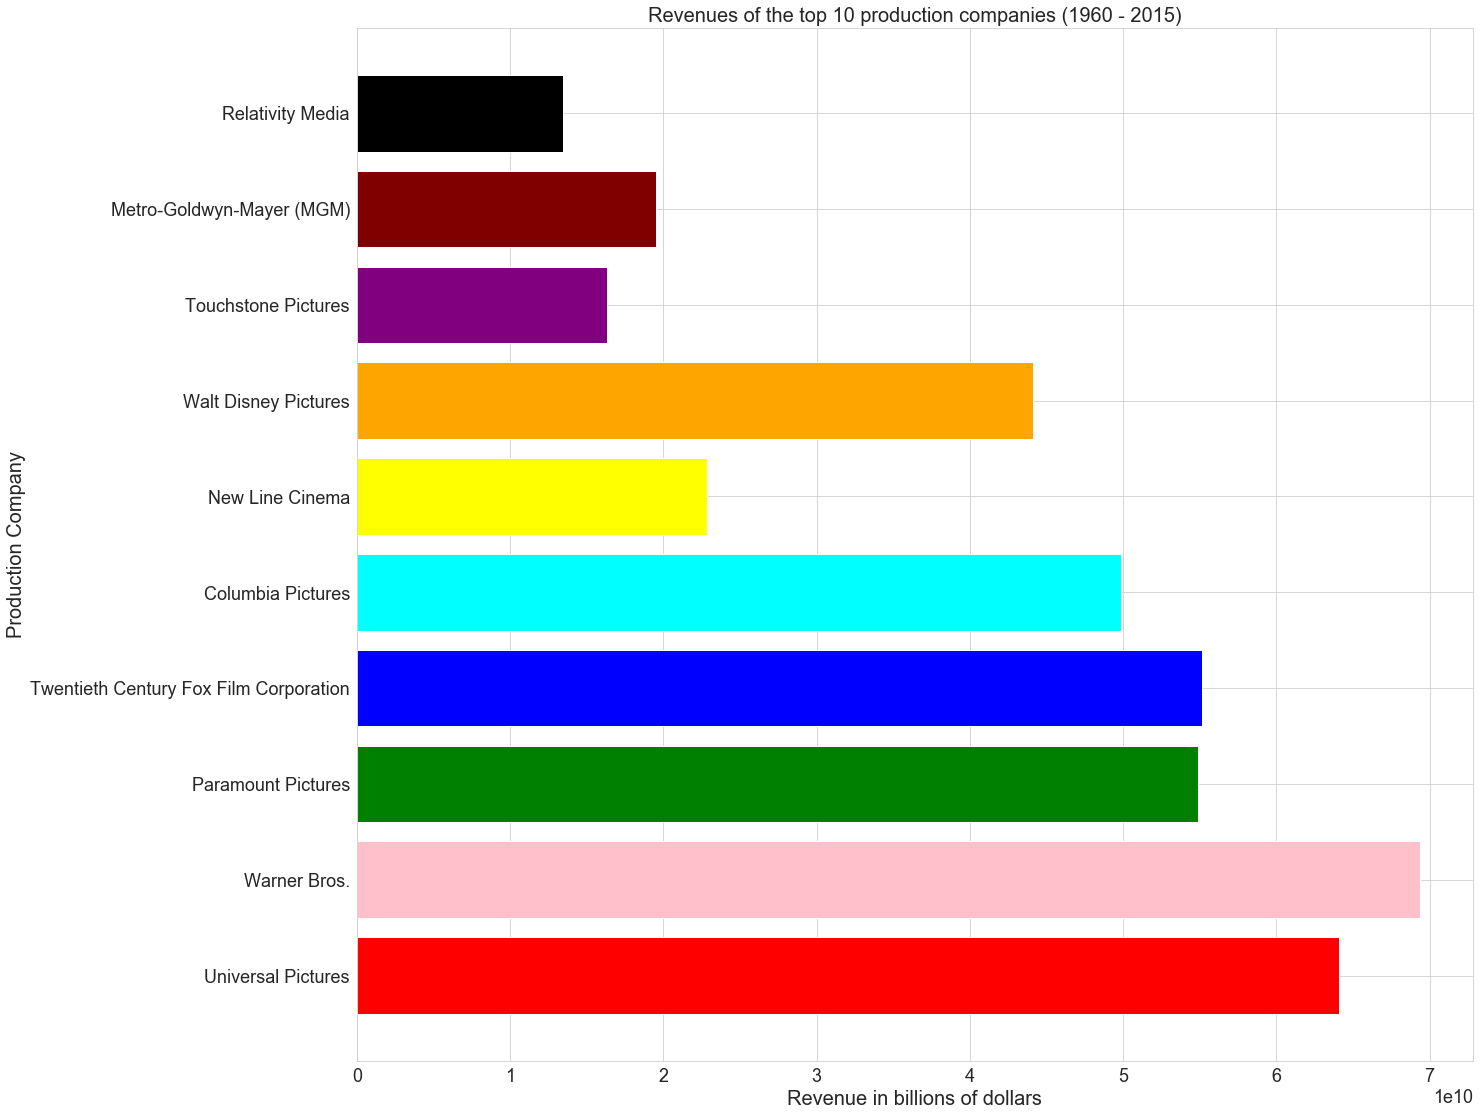

In [1236]:
#Plot the production companies vs revenue
plt.figure(figsize=(20,19))
plt.rcParams.update({'font.size': 18})
plt.barh(Names,Revenues,color=['red', 'pink', 'green', 'blue', 'cyan' ,'yellow','orange','purple','maroon','black'])
plt.title('Revenues of the top 10 production companies (1960 - 2015)',fontsize=20)
plt.xlabel('Revenue in billions of dollars',fontsize=20)
plt.ylabel('Production Company',fontsize=20);

### Conclusion

>Warner bros. is the largest production company with revenues of nearly 70 billion dollars from 1960 to 2015

### Research Question 5 : Is the budget of a film and its rating corellated?

>I want to find out if movies with bigger budgets got higher ratings on average. Lets sort by budget to have a look.

In [1237]:
df_movies.sort_values('budget_adj',ascending=False).head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,revenue_info
2244,0.250540,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,425000000.0,1.108757e+07,-4.139124e+08,<100M
3375,4.955130,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,2011-05-11,3180,6.3,2011,368371256.0,9.904175e+08,6.220462e+08,<1B
7387,4.965391,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,169,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,2007-05-19,2626,6.8,2007,315500574.0,1.010654e+09,6.951529e+08,>1B
6570,1.957331,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,Bryan Singer,154,Adventure|Fantasy|Action|Science Fiction,DC Comics|Legendary Pictures|Warner Bros.|Bad ...,2006-06-28,834,5.3,2006,292050672.0,4.230205e+08,1.309698e+08,<1B
5231,4.355219,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,271692064.0,2.506406e+09,2.234714e+09,NaN


>I suspected the budget of the movie 'The warrior's way' was incorrect so I googled it and found that its budget is in fact 40 million not 4 billion. I will remove it from our dataset.

In [1238]:
df_movies.drop([2244],inplace=True)

>Check again

In [1239]:
df_movies.sort_values('budget_adj',ascending=False).head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,revenue_info
3375,4.955130,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,2011-05-11,3180,6.3,2011,368371256.0,9.904175e+08,6.220462e+08,<1B
7387,4.965391,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,169,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,2007-05-19,2626,6.8,2007,315500574.0,1.010654e+09,6.951529e+08,>1B
6570,1.957331,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,Bryan Singer,154,Adventure|Fantasy|Action|Science Fiction,DC Comics|Legendary Pictures|Warner Bros.|Bad ...,2006-06-28,834,5.3,2006,292050672.0,4.230205e+08,1.309698e+08,<1B
5231,4.355219,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,271692064.0,2.506406e+09,2.234714e+09,NaN
7394,2.520912,Spider-Man 3,Tobey Maguire|Kirsten Dunst|James Franco|Thoma...,Sam Raimi,139,Fantasy|Action|Adventure,Columbia Pictures|Laura Ziskin Productions|Mar...,2007-05-01,2083,5.8,2007,271330494.0,9.369017e+08,6.655712e+08,<1B


>I can see straight away that their vote average is not very high and I suspect the correlation will not be strong

>I will graph a scatter graph and a correlation graph and see what insights I will get from them.

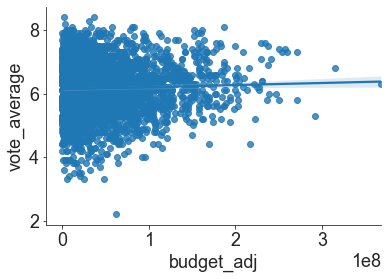

In [1240]:
#Draw a scatter plot

#Set the aesthetic style of the plots.
sns.set_style('ticks')
#Plot data and a linear regression model fit.
sns.regplot(df_movies.budget_adj,df_movies.vote_average)
#Remove the top and right spines from plot(s).
sns.despine()

>I dont notice any trend between budget and average ratings, the slope is approximatly parallel to the x axis

>Lets draw a correlation map and see what conclusions we get.

In [1241]:
corr = df_movies.corr()
corr.style.background_gradient(cmap='coolwarm')

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
popularity,1.000000,0.215016,0.780076,0.317922,0.173454,0.404559,0.546910,0.516921
runtime,0.215016,1.000000,0.273706,0.351781,-0.112335,0.338060,0.280444,0.235171
vote_count,0.780076,0.273706,1.000000,0.387250,0.207349,0.503832,0.654657,0.614280
vote_average,0.317922,0.351781,0.387250,1.000000,-0.134353,0.036343,0.266930,0.289170
release_year,0.173454,-0.112335,0.207349,-0.134353,1.000000,0.074267,-0.103029,-0.131822
budget_adj,0.404559,0.338060,0.503832,0.036343,0.074267,1.000000,0.577153,0.414337
revenue_adj,0.546910,0.280444,0.654657,0.266930,-0.103029,0.577153,1.000000,0.982376
profit,0.516921,0.235171,0.614280,0.289170,-0.131822,0.414337,0.982376,1.000000


### Conclusion

>The correlation coefficient between budget and vote average is 0.0332 which neglilable. There is no correlation between the two. So movies with higher budgets do not necessarily get a higher rating.

### Research Question 6 : Is the budget of a film and its revenue corellated.

>Lets find out if movies with higher budgets generate higher revenues.

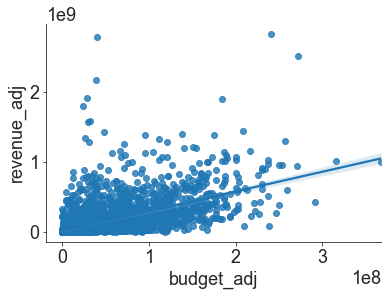

In [1242]:
#Draw a scatter plot

#Set the aesthetic style of the plots.
sns.set_style('ticks')
#Plot data and a linear regression model fit.
sns.regplot(df_movies.budget_adj,df_movies.revenue_adj)
#Remove the top and right spines from plot(s).
sns.despine()

### Conclusion

>We notice from the graph that there is quite a significant positive relation between the two.
The correlation between them from the previous graph is 0.59 ,So we can say that a higher budget will put you in favor of generating a higher revenue.

### Research Question 7 : What is the best month to release a movie?

>Lets see if a certain month shows higher revenues than others, I suspect that the summer holidays will have higher revenues on average. So June/July period.

In [1243]:
df_movies.groupby(['release_date']).mean()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
release_date,,,,,,,,
1970-01-24,0.717333,116.0,126.0,6.8,1970.0,19657289.0,458295656.0,438638367.0
1970-01-25,0.467344,172.0,188.0,6.9,1970.0,67396420.0,504349877.0,436953457.0
1970-02-09,0.279079,110.0,30.0,6.5,1970.0,39314578.0,5054731.0,-34259847.0
1970-03-05,0.336237,137.0,33.0,6.2,1970.0,56163683.0,564384086.0,508220403.0
1970-05-01,0.797231,95.0,163.0,5.9,1970.0,16849105.0,106709414.0,89860309.0
...,...,...,...,...,...,...,...,...
2068-12-04,0.569422,155.0,116.0,6.9,1968.0,48271019.0,131648235.0,83377216.0
2069-05-25,0.859806,113.0,124.0,7.0,1969.0,21399351.0,266214187.0,244814836.0
2069-06-17,0.615889,145.0,121.0,7.2,1969.0,37116502.0,3796250.0,-33320252.0


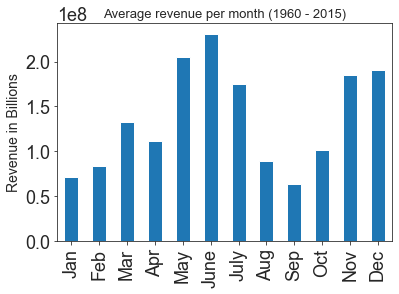

In [1244]:
# Group by month then get the average revenue.
ax = df_movies.groupby(df_movies['release_date'].dt.month)['revenue_adj'].mean().plot(kind='bar')
#List of months
labels = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']
#Set axis tick labels
ax.set_xticklabels(labels)
#Remove column name from x axis
ax.set_xlabel(None)
ax.set_ylabel('Revenue in Billions',fontsize=(14))
plt.title('Average revenue per month (1960 - 2015)',fontsize = (13));


### Conclusion

> We can see from the graph that out predictions where correct, the highest average revenue is in May/July period near summer time. Also the third highest average revenue is December which is christmas holiday month so it makes sense people will go out more to see movies.

>The lowest month is in September probably because its right after the holidays and people are going back to work

### Research Question 8 : What movie got the highest rating each year?

> I will group by year and see the movie with highest rating

In [1245]:
#Group by release year and find the max voteaverage for each year then get get the indices of each row and put it in a dataframe
idx = df_movies.groupby(['release_year'])['vote_average'].transform(max) == df_movies['vote_average']
#Sort dataframe by release year
highest_rating_movies = df_movies[idx].sort_values('release_year',ascending = False,ignore_index=True)

In [1246]:
highest_rating_movies.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,revenue_info
0,6.326804,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,2015-06-09,3935,8.0,2015,160999929.0,785411574.0,624411645.0,<1B
1,3.557846,Room,Brie Larson|Jacob Tremblay|Joan Allen|Sean Bri...,Lenny Abrahamson,117,Drama|Thriller,Element Pictures|No Trace Camping|A24|Duperele...,2015-10-16,1520,8.0,2015,5519997.0,32569603.0,27049606.0,<100M
2,4.780419,Whiplash,Miles Teller|J.K. Simmons|Melissa Benoist|Aust...,Damien Chazelle,105,Drama|Music,Bold Films|Blumhouse Productions|Right of Way ...,2014-10-10,2372,8.2,2014,3039600.0,12888912.0,9849312.0,<100M
3,4.877927,The Wolf of Wall Street,Leonardo DiCaprio|Jonah Hill|Margot Robbie|Kyl...,Martin Scorsese,180,Crime|Drama|Comedy,Paramount Pictures|Appian Way|EMJAG Production...,2013-12-25,4027,7.9,2013,93603335.0,366925723.0,273322388.0,<1B
4,3.625529,12 Years a Slave,Chiwetel Ejiofor|Michael Fassbender|Lupita Nyo...,Steve McQueen,134,Drama|History,Plan B Entertainment|Regency Enterprises|River...,2013-10-18,2241,7.9,2013,18720667.0,175038236.0,156317569.0,<1B


>Lets find out the highest rated movie in 1990

In [1247]:
highest_rating_movies[highest_rating_movies['release_year'] == 1990]

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,revenue_info
30,2.659926,Goodfellas,Robert De Niro|Ray Liotta|Joe Pesci|Lorraine B...,Martin Scorsese,146,Drama|Crime,Warner Bros.,1990-09-12,1798,8.0,1990,41722463.0,78165189.0,36442726.0,<100M


> Goodfellas by Martin Scorsese, one of the greatest movies of all time

### Research Question 9 : Who is the most popular director?

> I want to rank directors in terms of the sum of their popularity points.

In [1294]:
#Group by director then sum the popularity score for each one and take the top 10
popular_directors = df_movies.groupby(['director'])['popularity'].sum().sort_values(ascending = False)[:10]
popular_directors.index

Index(['Christopher Nolan', 'Steven Spielberg', 'Peter Jackson',
       'Quentin Tarantino', 'Ridley Scott', 'George Miller', 'David Fincher',
       'Tim Burton', 'Colin Trevorrow', 'Robert Zemeckis'],
      dtype='object', name='director')

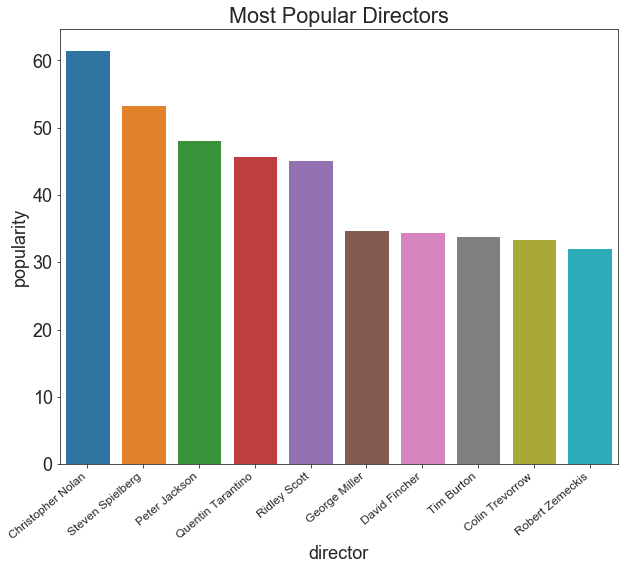

In [1296]:
#set figure size
plt.figure(figsize=(10,8))
ab=sns.barplot(popular_directors.index,popular_directors);
#Rotate xtick labels
ab.set_xticklabels(ab.get_xticklabels(),rotation = 40, ha ='right', fontsize = 12 );
plt.title('Most Popular Directors');

### Conclusion

> Christopher Nolan is the most popular director with a score over 60.

### Research Question 10 : What is the most frequent runtime of movies?

>I will plot a kernel density estimate.

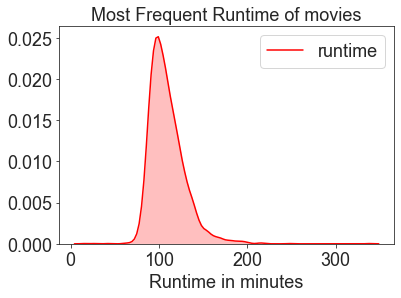

In [1299]:
sns.kdeplot(df_movies['runtime'], shade = True, color = 'r');
plt.xlabel('Runtime in minutes',fontsize = 18);

plt.title('Most Frequent Runtime of movies', fontsize = 18);

### Conclusion

> The most frequent runtime is arount the 95 minutes mark

<a id='conclusions'></a>
## Conclusions



>After my overall analysis I found

#### Movies with high revenues have a higher runtime than the average. Around the 130 min mark.

#### Drama is the most popular genre of all time, followed by comedy.

#### Tom Hanks is the actor with most roles in popular movies, followed by Leo di Caprio and Robert de Niro

#### Warner bros. is the largest production company with revenues of nearly 70 billion dollars from 1960 to 2015 followed by Universal studios.

#### The correlation coefficient between budget and vote average is 0.0332 which neglilable. There is no correlation between the two. So movies with higher budgets do not necessarily get a higher rating.

#### The correlation between budget and revenue is 0.59 ,So we can say that a higher budget will put you in favor of generating a higher revenue.

#### The highest average revenue is in May/July period near summer time. Also the third highest average revenue is December which is christmas holiday month so it makes sense people will go out more to see movies. These are the best months to release a movie.

#### Christopher Nolan is the most popular director with a score over 60.



Finally the dataset I used had 10886 rows in total but it had a lot of missing values & some values in the runtime,budget,revenue columns were zero so I had to delete these rows.After doing all the cleaning the data left was of 7028 rows that means I lost apprx 3000 rows which would have definitely helped me in my findings if the information it contained wasn't false.